In [9]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Data augmentation and normalization
from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.applications import VGG16

DataAugmentation = tf.keras.Sequential([
    Rescaling(1./255),
    RandomFlip("horizontal_and_vertical"),
    RandomRotation(0.3),  # Increased rotation
    RandomZoom(0.3)       # Increased zoom
])

TrainingData = tf.keras.utils.image_dataset_from_directory(
    'Dataset/Train'
).map(lambda x, y: (DataAugmentation(x), y))

ValidationData = tf.keras.utils.image_dataset_from_directory(
    'Dataset/Validation'
).map(lambda x, y: (DataAugmentation(x), y))

TestingData = tf.keras.utils.image_dataset_from_directory(
    'Dataset/Test', shuffle=False
).map(lambda x, y: (Rescaling(1./255)(x), y))

Found 1843 files belonging to 2 classes.
Found 235 files belonging to 2 classes.
Found 437 files belonging to 2 classes.


In [11]:
# Define the enhanced CNN model with VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
base_model.trainable = False  # Freeze base model layers

Model = tf.keras.Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.5),
    BatchNormalization(),
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dense(1, activation='sigmoid')
])

# Compile the model
Model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

# Set up callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TensorBoard

LogDir = 'logs'
Tensorboard_Callback = TensorBoard(log_dir=LogDir)
Checkpoint_Callback = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')
EarlyStopping_Callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
ReduceLROnPlateau_Callback = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.00001)

class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}: Training Accuracy: {logs['accuracy']:.2f}, Validation Accuracy: {logs['val_accuracy']:.2f}")

# Train the model
History = Model.fit(
    TrainingData,
    epochs=20,
    validation_data=ValidationData,
    callbacks=[Tensorboard_Callback, Checkpoint_Callback, EarlyStopping_Callback, ReduceLROnPlateau_Callback, CustomCallback()]
)

Epoch 1/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.5148 - loss: 1.3738Epoch 1: Training Accuracy: 0.53, Validation Accuracy: 0.67
58/58 ━━━━━━━━━━━━━━━━━━━━ 580s 10s/step - accuracy: 0.5150 - loss: 1.3728 - val_accuracy: 0.6681 - val_loss: 1.2221 - learning_rate: 1.0000e-04
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.5411 - loss: 1.2177 Epoch 2: Training Accuracy: 0.56, Validation Accuracy: 0.64
58/58 ━━━━━━━━━━━━━━━━━━━━ 785s 14s/step - accuracy: 0.5414 - loss: 1.2174 - val_accuracy: 0.6426 - val_loss: 1.0797 - learning_rate: 1.0000e-04
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.5987 - loss: 1.1180Epoch 3: Training Accuracy: 0.59, Validation Accuracy: 0.67
58/58 ━━━━━━━━━━━━━━━━━━━━ 546s 9s/step - accuracy: 0.5984 - loss: 1.1181 - val_accuracy: 0.6681 - val_loss: 1.0491 - learning_rate: 1.0000e-04
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.5941 - loss: 1.1178Epoch 4: Training Accuracy: 0.59, Validation Accuracy: 0

In [13]:
# Evaluate the model on the testing data
test_loss, test_accuracy = Model.evaluate(TestingData)
print(f"Test Accuracy: {test_accuracy:.2f}, Test Loss: {test_loss:.2f}")

# Visualize predictions on a batch of testing data
DataIterator = TestingData.as_numpy_iterator()
Batch = DataIterator.next()

14/14 ━━━━━━━━━━━━━━━━━━━━ 127s 9s/step - accuracy: 0.6353 - loss: 0.9780
Test Accuracy: 0.73, Test Loss: 0.90


1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


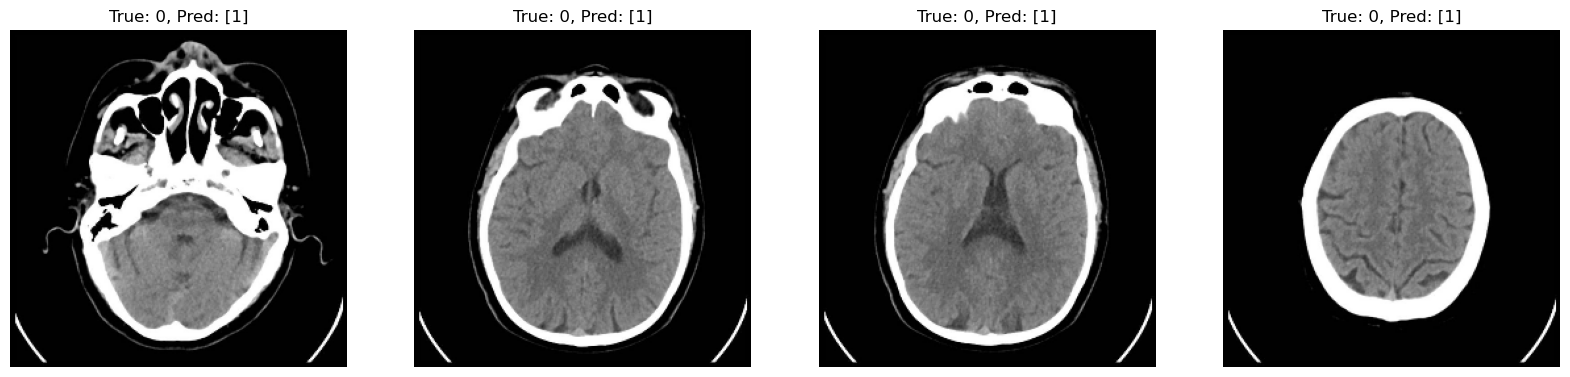

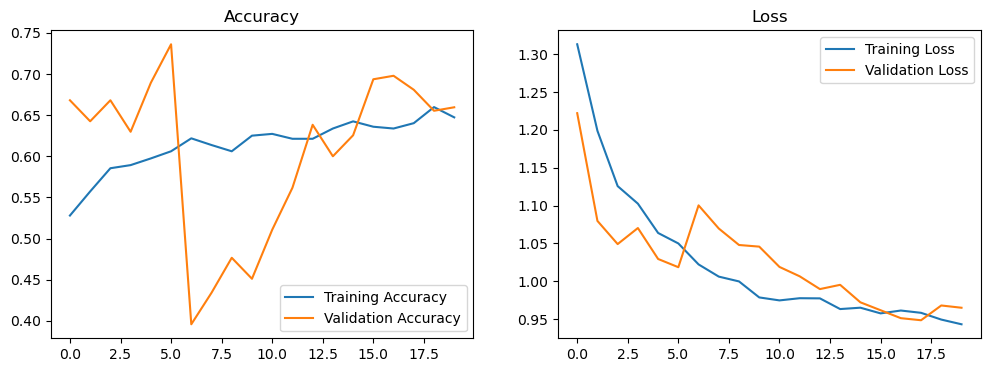

2024-11-19 18:50:38.643866: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


2024-11-19 18:52:46.068465: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


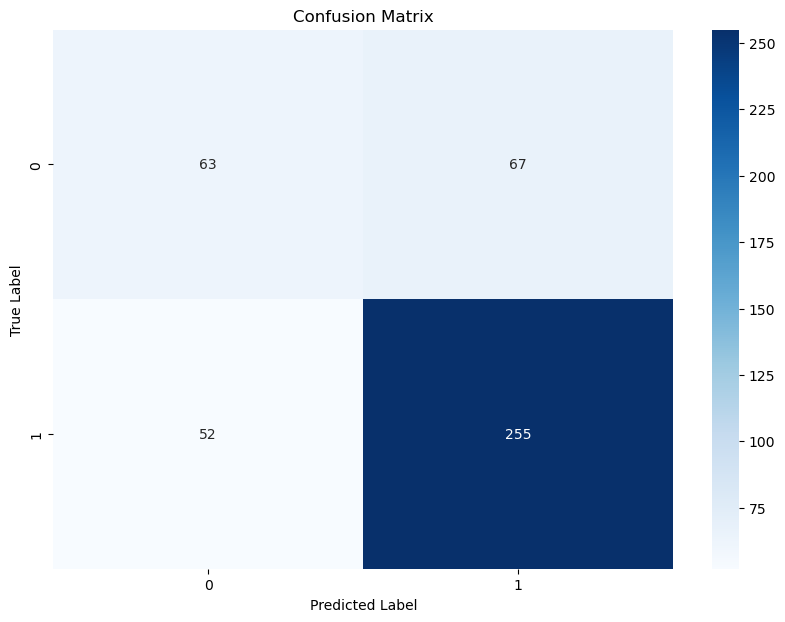

In [15]:
# Make predictions
predictions = Model.predict(Batch[0])

# Display images with predictions
fig, ax = plt.subplots(1, 4, figsize=(20, 20))
for idx in range(min(4, len(Batch[0]))):  # Ensure batch size is handled dynamically
    ax[idx].imshow(Batch[0][idx].astype(float))
    true_label = Batch[1][idx]
    predicted_label = (predictions[idx] > 0.5).astype(int)  # Convert probabilities to binary labels
    ax[idx].set_title(f'True: {true_label}, Pred: {predicted_label}')
    ax[idx].axis('off')

plt.show()

# Plotting accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(History.history['accuracy'], label='Training Accuracy')
plt.plot(History.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(History.history['loss'], label='Training Loss')
plt.plot(History.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

# Confusion matrix for testing data
y_true = np.concatenate([y for x, y in TestingData], axis=0)
y_pred = np.concatenate([Model.predict(x) > 0.5 for x, y in TestingData], axis=0)

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()